In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d saurabhbadole/bank-customer-churn-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 77.0MB/s]


In [ ]:
!unzip bank-customer-churn-prediction-dataset.zip -d ./bank-customer-churn-prediction-dataset

Archive:  bank-customer-churn-prediction-dataset.zip
replace ./bank-customer-churn-prediction-dataset/Churn_Modelling.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd

# Load the dataset
# Removed the extra space at the end of the file name
# and added the folder where the data was extracted
df = pd.read_csv('./bank-customer-churn-prediction-dataset/Churn_Modelling.csv')
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [ ]:
# Check the structure of the data
print(df.info())

# Basic statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  1000

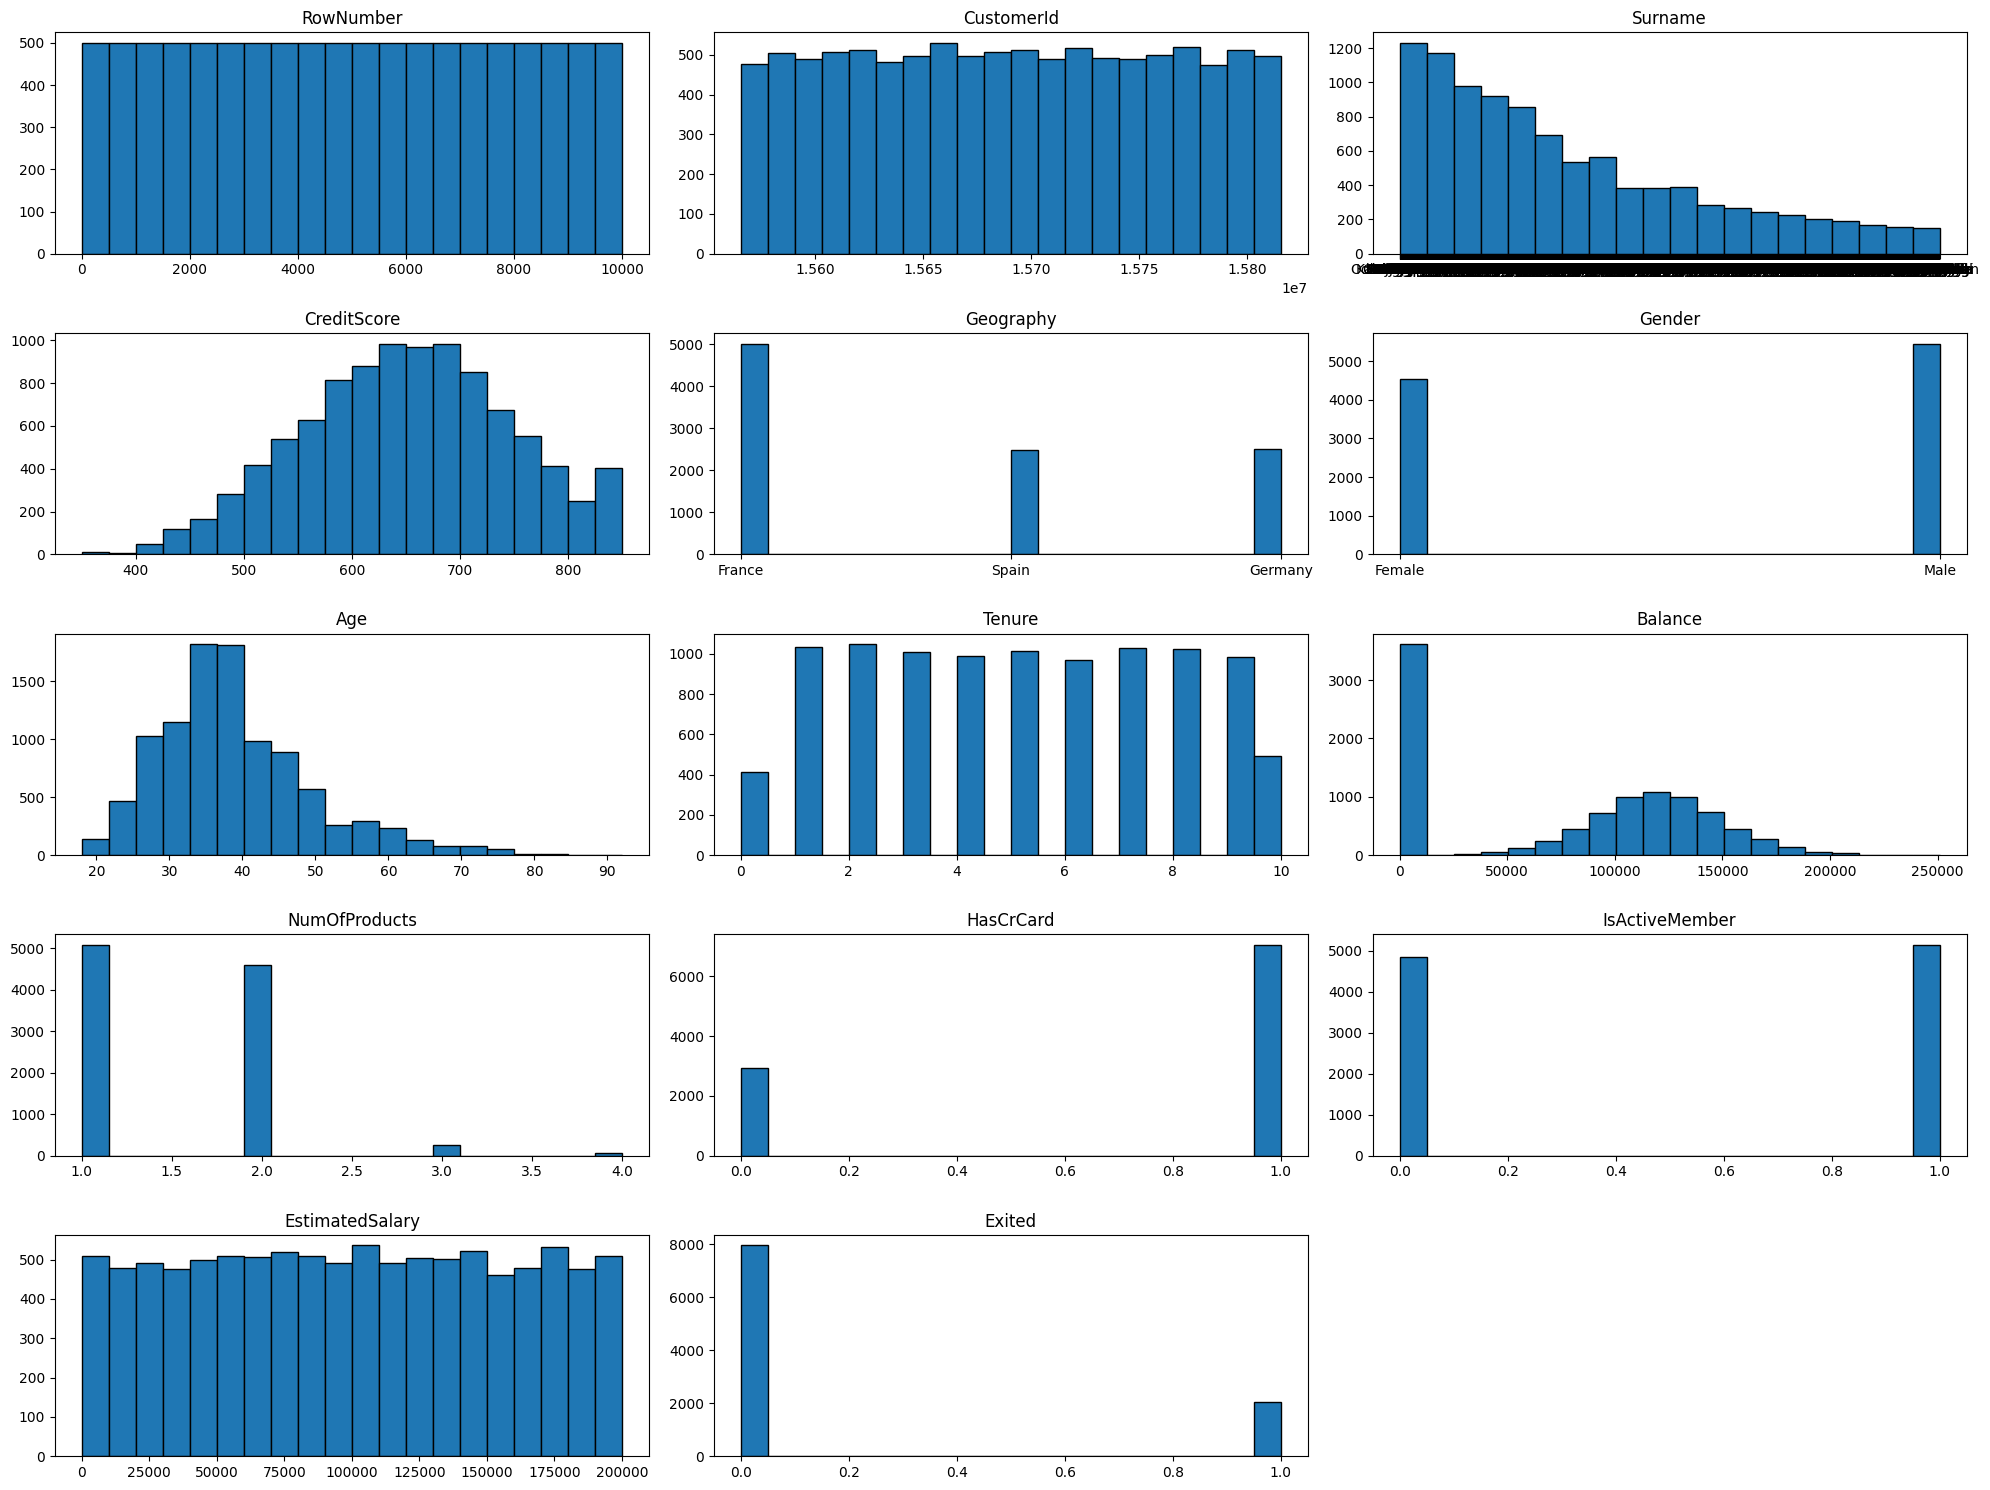

In [ ]:
import matplotlib.pyplot as plt
# Set up the figure size
plt.figure(figsize=(20, 15))

# Loop through each column and plot a histogram
for i, col in enumerate(df.columns):
    plt.subplot(len(df.columns) // 3 + 1, 3, i + 1)
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.title(col)
    plt.tight_layout()

# Display the plot
plt.show()


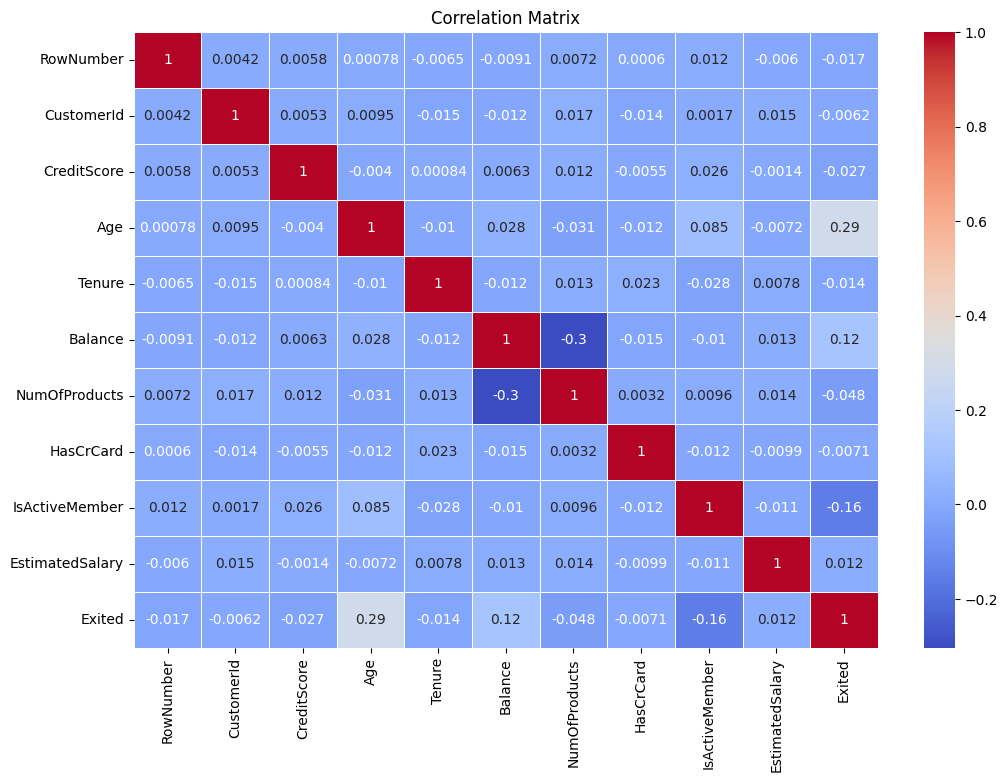

In [ ]:
import seaborn as sns # Importing the seaborn library
import matplotlib.pyplot as plt

# Compute the correlation matrix for numerical columns only
correlation_matrix = df.select_dtypes(include=['number']).corr() # Selecting only numerical columns for correlation calculation

# Set up the figure size
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    annot_kws={"size": 10}
)

# Add a title
plt.title('Correlation Matrix')
plt.show()


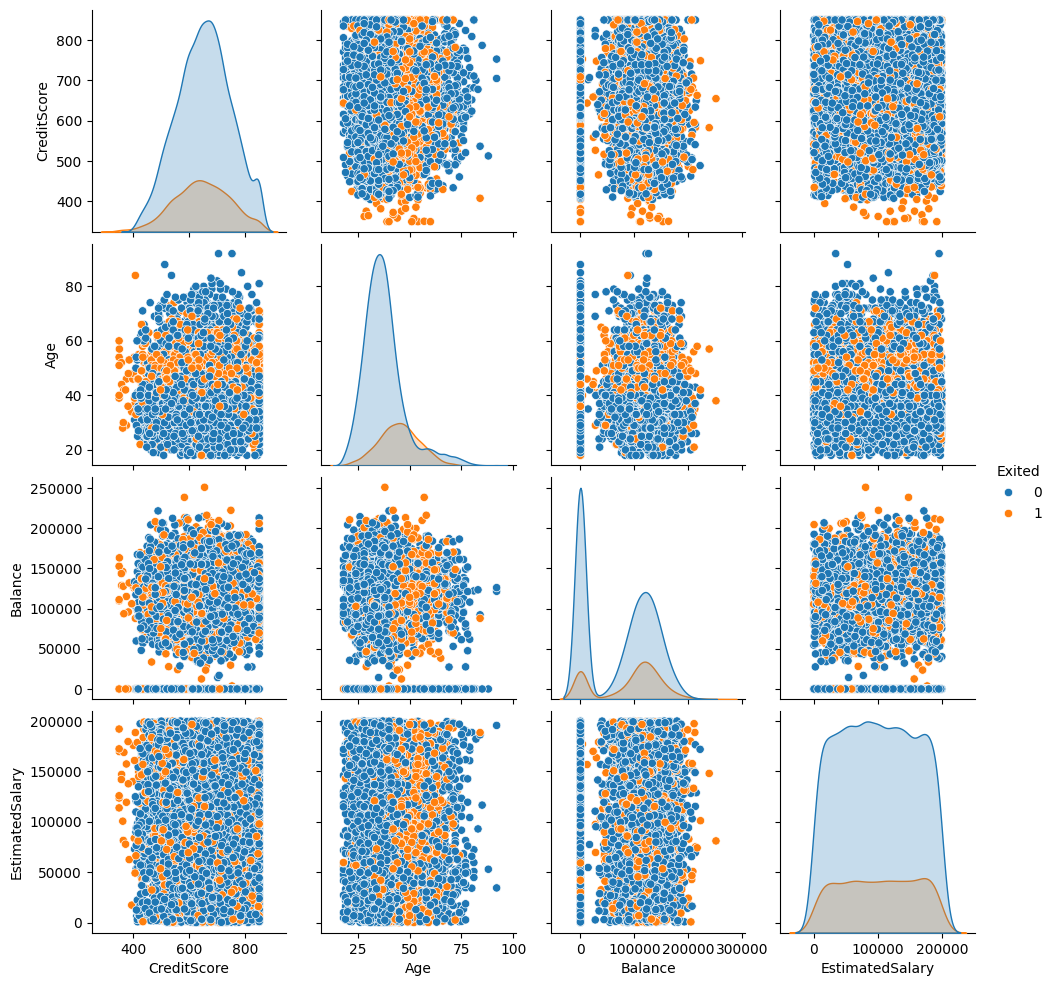

In [ ]:
# Pair plot for selected columns
sns.pairplot(df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']], hue='Exited')
plt.show()


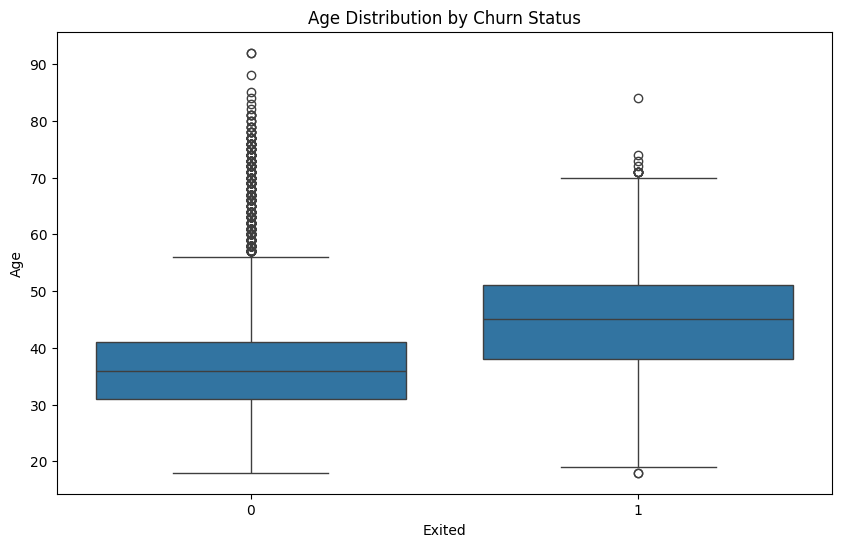

In [ ]:
# Box plot for Age distribution by churn status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Age Distribution by Churn Status')
plt.show()


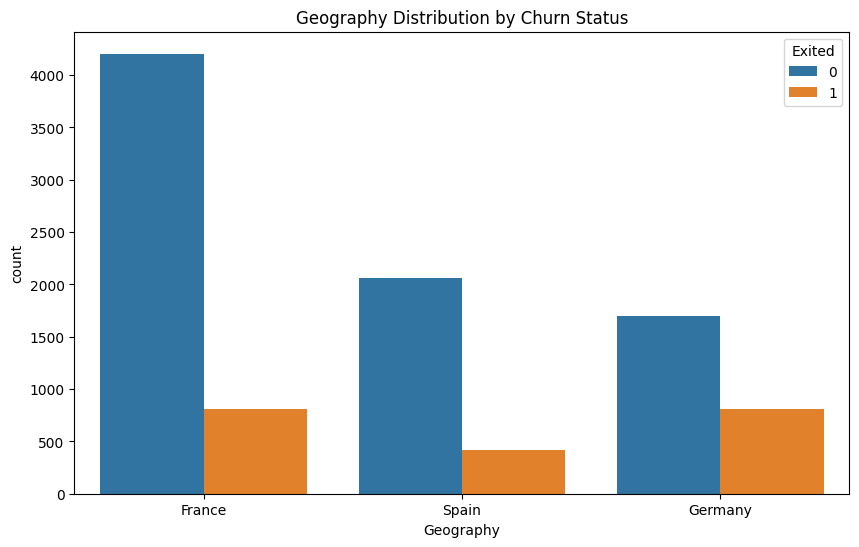

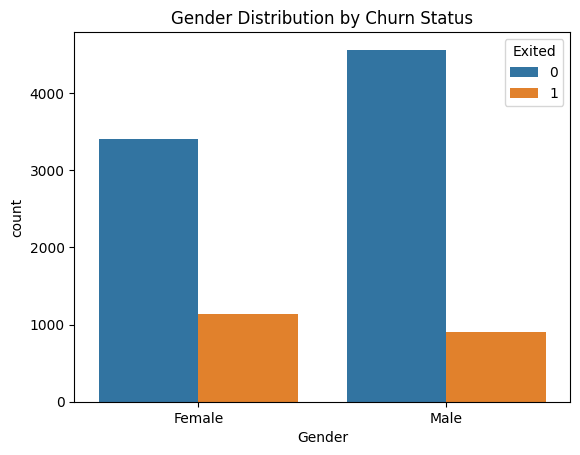

In [ ]:
# Count plot for Geography
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Geography Distribution by Churn Status')
plt.show()

# Count plot for Gender
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Gender Distribution by Churn Status')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode 'Geography' and 'Gender'
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

# Check the transformed columns
print(df[['Geography', 'Gender']].head())



   Geography  Gender
0          0       0
1          2       0
2          0       0
3          0       0
4          2       0


In [ ]:
# Features (drop 'RowNumber', 'CustomerId', 'Surname', 'Exited')
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)

# Target variable
y = df['Exited']


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the feature set
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for clarity
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df.head())


   CreditScore  Geography    Gender       Age    Tenure   Balance  \
0    -0.326221  -0.901886 -1.095988  0.293517 -1.041760 -1.225848   
1    -0.440036   1.515067 -1.095988  0.198164 -1.387538  0.117350   
2    -1.536794  -0.901886 -1.095988  0.293517  1.032908  1.333053   
3     0.501521  -0.901886 -1.095988  0.007457 -1.387538 -1.225848   
4     2.063884   1.515067 -1.095988  0.388871 -1.041760  0.785728   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary   Cluster  \
0      -0.911583   0.646092        0.970243         0.021886 -1.257933   
1      -0.911583  -1.547768        0.970243         0.216534 -1.257933   
2       2.527057   0.646092       -1.030670         0.240687 -1.257933   
3       0.807737  -1.547768       -1.030670        -0.108918 -0.034858   
4      -0.911583   0.646092        0.970243        -0.365276 -1.257933   

        CLV  Risk_Score  
0 -0.901822   -1.071876  
1 -0.703552   -0.126725  
2  2.119933    2.529304  
3 -0.901822   -1.071876  
4 -0.30796

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Display shapes of the splits
print(X_train.shape, X_test.shape)


(8000, 10) (2000, 10)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Print accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.864
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



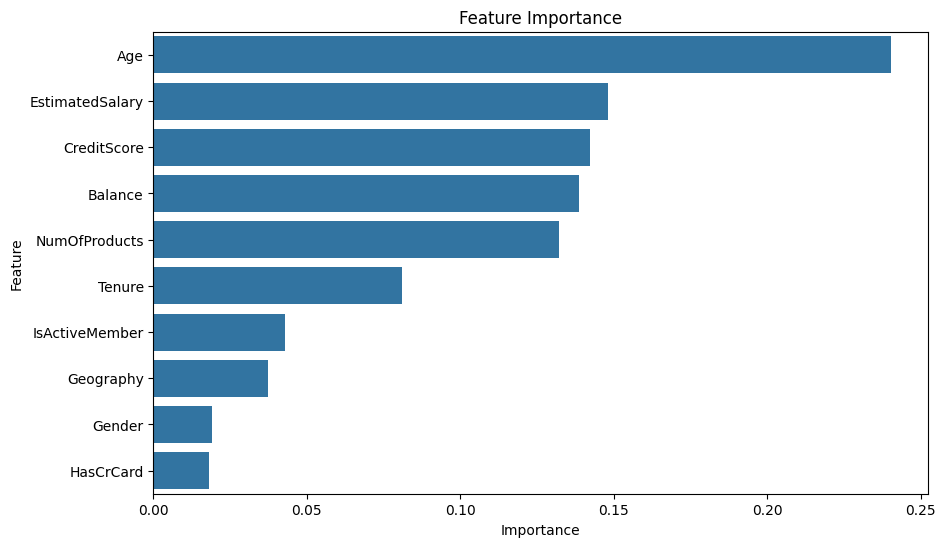

In [ ]:
# Plot feature importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

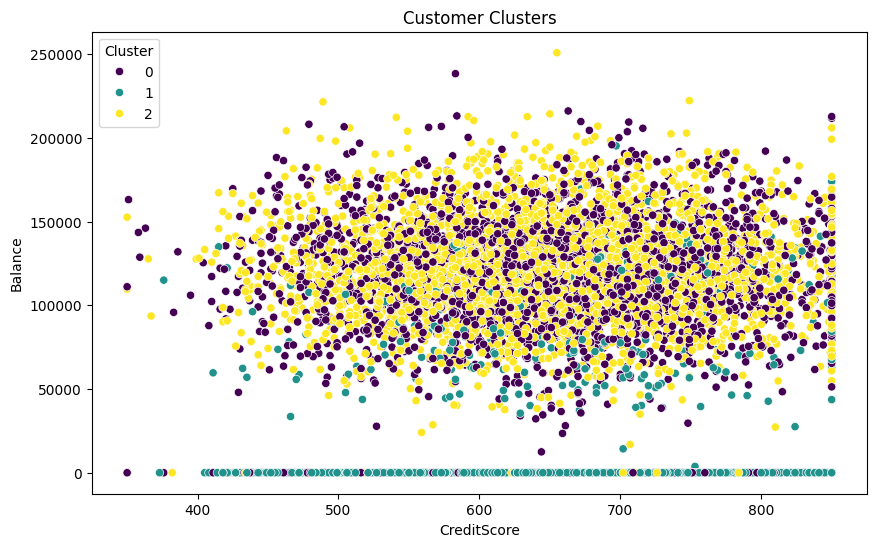

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['CreditScore'], y=df['Balance'], hue=df['Cluster'], palette='viridis')
plt.title('Customer Clusters')
plt.show()

Exited      0    1
Cluster           
0        2261  943
1        2867  440
2        2835  654


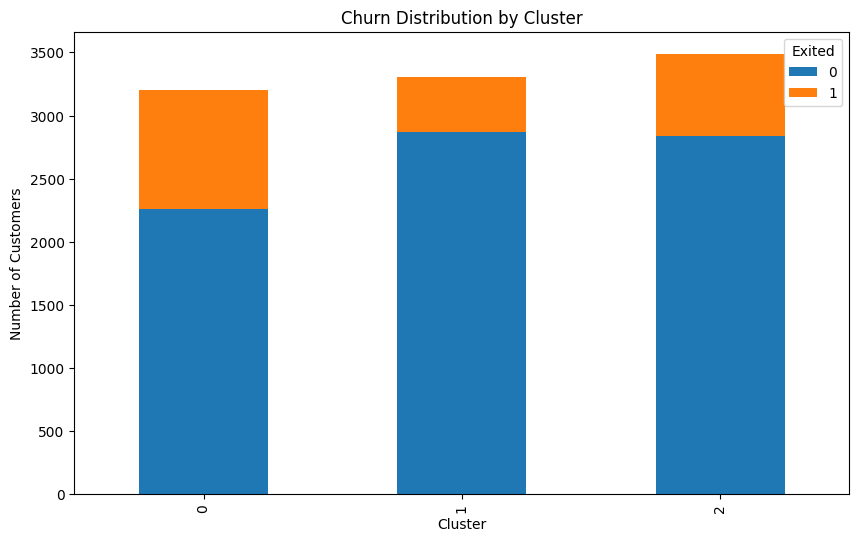

In [ ]:
# Count churn status in each cluster
cluster_analysis = df.groupby(['Cluster', 'Exited']).size().unstack()
print(cluster_analysis)

# Visualize churn distribution across clusters
cluster_analysis.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Churn Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

# Example target for CLV (assume estimated revenue feature exists)
df['CLV'] = df['Balance'] * df['Tenure'] * 0.1  # Simplified assumption

# Features for CLV prediction
X_clv = df[['Tenure', 'Balance', 'NumOfProducts']]
y_clv = df['CLV']

# Train a regression model
clv_model = LinearRegression()
clv_model.fit(X_clv, y_clv)

# Predict and evaluate
clv_predictions = clv_model.predict(X_clv)
print("CLV Predictions:", clv_predictions[:10])


CLV Predictions: [-23510.72147466  10910.62298866 102811.08406668 -31334.57525958
  39589.17631206  79843.82119308  14941.09550554  49419.91331466
  63218.68070181  44160.66390626]


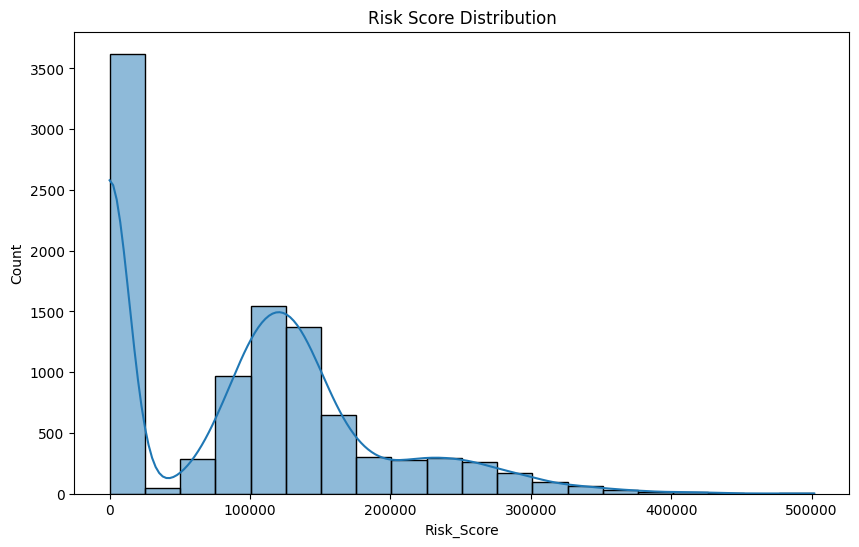

In [ ]:
# Identify high-risk customers as those with high balance and churn tendency
df['Risk_Score'] = df['Balance'] * (df['Exited'] + 1)

# Visualize risk distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Risk_Score'], kde=True, bins=20)
plt.title('Risk Score Distribution')
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Target is the number of products
X_upsell = X_scaled
y_upsell = df['NumOfProducts']

# Train a Gradient Boosting model
upsell_model = GradientBoostingClassifier(random_state=42)
upsell_model.fit(X_upsell, y_upsell)

# Predict number of products
upsell_predictions = upsell_model.predict(X_upsell)
print("Upsell Predictions:", upsell_predictions[:10])


Upsell Predictions: [1 1 3 2 1 2 2 4 2 1]


In [ ]:
# Filter non-exited customers
non_exited_customers = df[df['Exited'] == 0]


In [ ]:
# Save upsell predictions for non-exited customers
# Add the 'Upsell_Prediction' column to the DataFrame
non_exited_customers['Upsell_Prediction'] = upsell_predictions[df['Exited'] == 0]

# Now you can save to CSV
non_exited_customers[['CustomerId', 'Upsell_Prediction']].to_csv('upsell_predictions_non_exited.csv', index=False)

print("Upsell predictions saved for non-exited customers.")

Upsell predictions saved for non-exited customers.


<ipython-input-33-f2523ab83c43>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_exited_customers['Upsell_Prediction'] = upsell_predictions[df['Exited'] == 0]


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Encode categorical variables
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

# Features and target
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df['Exited']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate model performance
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Predict churn for all customers
df['Churn_Prediction'] = model.predict(X_scaled)

# Display customers predicted to churn
predicted_to_churn = df[df['Churn_Prediction'] == 1]
print(predicted_to_churn[['CustomerId', 'Churn_Prediction']].head())

# Save predicted churn customers to a CSV
predicted_to_churn[['CustomerId', 'Churn_Prediction']].to_csv('predicted_churn_customers.csv', index=False)

print("Predicted churn customers saved to 'predicted_churn_customers.csv'.")


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1607
           1       0.96      0.85      0.90       393

    accuracy                           0.96      2000
   macro avg       0.96      0.92      0.94      2000
weighted avg       0.96      0.96      0.96      2000

    CustomerId  Churn_Prediction
2     15619304                 1
5     15574012                 1
7     15656148                 1
16    15737452                 1
22    15699309                 1
Predicted churn customers saved to 'predicted_churn_customers.csv'.


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Encode categorical variables
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

# Features and target
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df['Exited']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate model performance
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Predict churn for all customers
df['Churn_Prediction'] = model.predict(X_scaled)

# Filter non-exited customers and those predicted to churn
non_exited_customers = df[df['Exited'] == 0]
predicted_to_churn = non_exited_customers[non_exited_customers['Churn_Prediction'] == 1]

# Display and save customers predicted to churn
print(predicted_to_churn[['CustomerId', 'Churn_Prediction']].head())
predicted_to_churn[['CustomerId', 'Churn_Prediction']].to_csv('predicted_churn_non_exited_customers.csv', index=False)

print("Predicted churn customers (who have not yet exited) saved to 'predicted_churn_non_exited_customers.csv'.")


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

     CustomerId  Churn_Prediction
400    15690452                 1
710    15722548                 1
735    15784209                 1
837    15589488                 1
850    15572265                 1
Predicted churn customers (who have not yet exited) saved to 'predicted_churn_non_exited_customers.csv'.


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Profit_Segment
Low       4932
High      2466
Medium    2465
Name: count, dtype: int64


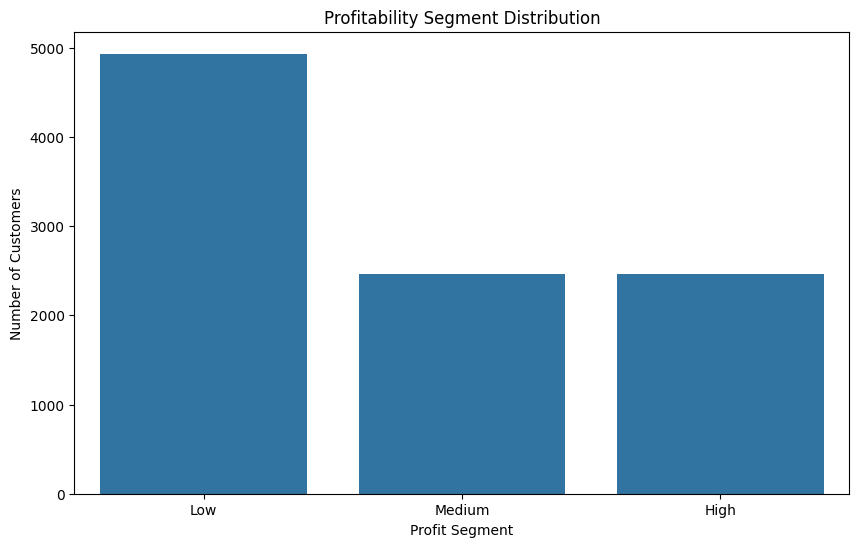

In [ ]:
# Assume profitability is influenced by Balance, NumOfProducts, and Tenure
df['Profitability'] = df['Balance'] * df['NumOfProducts'] / df['Tenure']

# Segment customers into quartiles based on profitability
# Setting duplicates='drop' to handle non-unique bin edges
# Changed the number of labels to 3 to match the 4 bin edges (quartiles)
df['Profit_Segment'] = pd.qcut(df['Profitability'], 4, labels=['Low', 'Medium', 'High'], duplicates='drop')

# Display segment distribution
segment_distribution = df['Profit_Segment'].value_counts()
print(segment_distribution)

# Visualize profitability segments
plt.figure(figsize=(10, 6))
# Updated the order to match the new labels
sns.countplot(x='Profit_Segment', data=df, order=['Low', 'Medium', 'High'])
plt.title('Profitability Segment Distribution')
plt.xlabel('Profit Segment')
plt.ylabel('Number of Customers')
plt.show()
